**Mizan Ghazy Praraya - 1103210024**

WEEK 1 TASK 2

Regression model Multiple Linear Regression pada 50_Startups

In [15]:
# Pertama perlu mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score




*   pandas, numpy, dan matplotlib untuk mengelola data dan memvisualisasikannya.
*   train_test_split untuk membagi dataset menjadi data latih dan data uji.
*   LinearRegression untuk membuat model regresi linier berganda.
* LabelEncoder untuk menangani data kategorikal (kolom 'State').
* mean_squared_error dan r2_score untuk evaluasi model.


In [16]:
# Upload dataset 50_Startups.csv
from google.colab import files
uploaded = files.upload()

# Membaca dataset 50_Startups.csv yang telah diunggah
df = pd.read_csv('50_Startups.csv')

# Melihat beberapa baris pertama dari dataset
df.head()


Saving 50_Startups.csv to 50_Startups (1).csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* Pada bagian ini, mengunggah file 50_Startups.csv dari lokal ke Google Colab dan membacanya ke dalam dataframe df. Fungsi df.head() digunakan untuk menampilkan 5 baris pertama dataset dan memastikan datanya telah dimuat dengan benar

In [17]:
# Mengidentifikasi apakah ada kolom kategorikal yang perlu diubah menjadi numerik
# Di sini kolom 'State' adalah kategorikal, sehingga harus diencoding menjadi numerik
# Menggunakan LabelEncoder untuk mengonversi variabel kategorikal menjadi numerik
labelencoder = LabelEncoder()
df['State'] = labelencoder.fit_transform(df['State'])


* Kolom State adalah variabel kategorikal yang tidak bisa langsung digunakan dalam model regresi linier. Oleh karena itu, kita menggunakan LabelEncoder untuk mengonversi kolom ini menjadi numerik (misalnya, California = 0, Florida = 1, New York = 2).

In [18]:
# Menyiapkan variabel independen (X) dan dependen (y)
# Variabel independen terdiri dari beberapa fitur: R&D Spend, Administration, Marketing Spend, dan State
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']  # Variabel dependen adalah Profit


* Menyiapkan variabel independen (X) yang terdiri dari beberapa fitur: R&D Spend, Administration, Marketing Spend, dan State. Variabel dependen (y) adalah Profit, yang merupakan target prediksi.

In [19]:
# Membagi dataset menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Dataset dibagi menjadi dua bagian:
* 80% data latih (training): digunakan untuk melatih model.
* 20% data uji (testing): digunakan untuk menguji performa model.


Parameter random_state=0 digunakan untuk memastikan pembagian data tetap sama setiap kali kode dijalankan ulang.



In [20]:
# Membuat objek dari model Multiple Linear Regression
model = LinearRegression()

# Melatih model menggunakan data latih (X_train dan y_train)
model.fit(X_train, y_train)


LinearRegression()

* Bagian ini membuat objek model regresi linier berganda menggunakan LinearRegression() dan melatihnya dengan data latih X_train dan y_train. Model akan belajar dari hubungan antara beberapa variabel input (X) dan output (y).

In [21]:
# Memprediksi data uji (X_test) menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)


* Model yang telah dilatih digunakan untuk memprediksi nilai Profit berdasarkan data uji X_test. Hasil prediksi disimpan di variabel y_pred.

In [22]:
# Menampilkan koefisien dan intercept dari model regresi linear
print("Koefisien (Slope):", model.coef_)
print("Intercept:", model.intercept_)


Koefisien (Slope): [7.77203690e-01 3.02432445e-02 3.49236072e-02 3.15877202e+02]
Intercept: 42658.087123248915


* Koefisien (slope) menunjukkan seberapa besar pengaruh setiap variabel independen terhadap variabel dependen (Profit). Intercept adalah titik potong model dengan sumbu y, yang menunjukkan nilai prediksi ketika semua variabel independen bernilai 0.

In [23]:
# Menampilkan hasil prediksi dan nilai aktual untuk membandingkan
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_compare)


       Actual      Predicted
28  103282.38  103959.405080
11  144259.40  132398.732367
10  146121.95  133529.037901
41   77798.83   72958.283683
2   191050.39  179534.787372
27  105008.31  115533.625841
38   81229.06   67476.958479
31   97483.56   98504.361994
22  110352.25  114789.160838
4   166187.94  168972.219099


* Dataframe df_compare dibuat untuk menampilkan nilai aktual y_test dan nilai prediksi y_pred, sehingga kita bisa membandingkan hasil prediksi dengan data sebenarnya.

In [24]:
# Menghitung Mean Squared Error (MSE) dan R-squared (R2) untuk melihat seberapa baik model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)


Mean Squared Error: 78413822.17201349
R-Squared: 0.9386861070938133


* Mean Squared Error (MSE) mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil MSE, semakin baik model. R-squared (R²) mengukur seberapa baik model kita menjelaskan variabilitas data. Nilai R² yang lebih mendekati 1 menunjukkan bahwa model lebih baik dalam memprediksi.

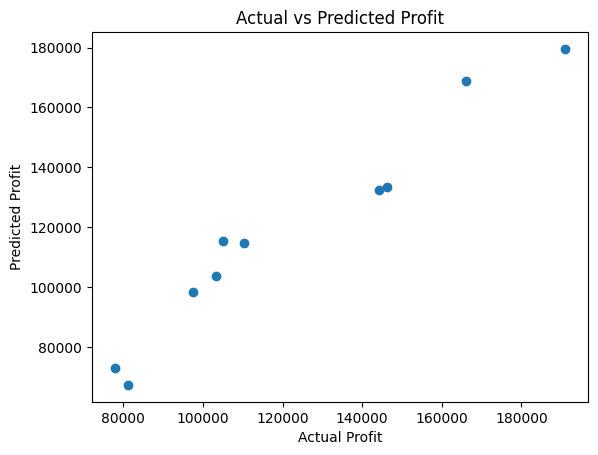

In [25]:
# Visualisasi hasil prediksi vs aktual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()


* Grafik scatter ini menampilkan hubungan antara nilai profit aktual (y_test) dan prediksi profit (y_pred). Jika model sempurna, semua titik akan berada di garis diagonal. Makin dekat titik dengan garis ini, makin baik performa model.